___
# Project-08: Loan Prediction
___

In [3]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser


import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install feature-engine

In [5]:
# downloading the dataset
#df = pd.read_clipboard()

In [6]:
#df.to_csv('loan_pred.csv')

In [7]:
# importing the dataset
df = pd.read_csv('loan_pred.csv')

In [8]:
df.drop('Unnamed: 0',1,inplace=True)

In [9]:
# head
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# tail
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [11]:
# 5 random samples
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
330,LP002097,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban,Y
385,LP002237,Male,No,1,Graduate,NaN,3667,0.0,113.0,180.0,1.0,Urban,Y
66,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N
375,LP002211,Male,Yes,0,Graduate,No,4817,923.0,120.0,180.0,1.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y


In [12]:
# description of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
# shape of the dataset
df.shape

(614, 13)

In [15]:
# seprating categorical and numerical values
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

num_var = _find_numerical_variables(df)
cat_var = _find_categorical_variables(df)

In [16]:
num_var,len(num_var)

(['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'],
 5)

In [17]:
cat_var,len(cat_var)

(['Loan_ID',
  'Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 8)

In [18]:
# shape of the dataset
df.shape

(614, 13)

In [19]:
# checking for missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* Ther are in total 614 observations
* There are 13 Dependable variables and 1 Independent 

In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Chech the correlations of the features with the dataset

In [21]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


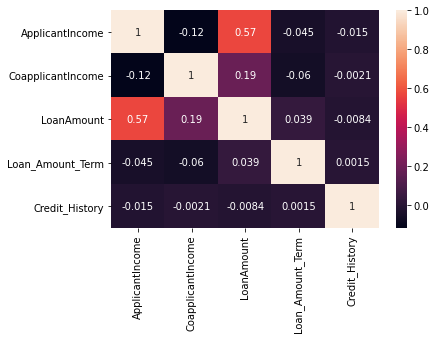

In [22]:
# plotting the correlation
sns.heatmap(df.corr(),annot=True)

## Check for missing values in the dataset:

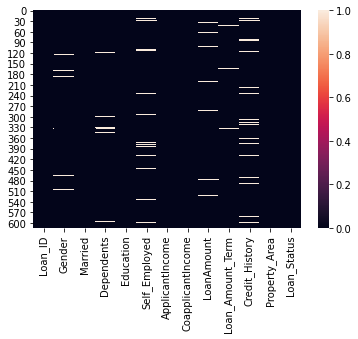

In [23]:
sns.heatmap(df.isna())

In [24]:
# plotting the missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df.isna().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<b>INFERENCES:</b>

* There are 614 saples in total.
* This dataset has 13 Features and a target variable.
* The target variable here is Loan_Status.
* This is a classification problem as we have to predict where to lend the load or not.
* In such problems, the classes in the dataset are mostly imbalanced.
* We can see that there are some missing values in the dataset.
* Non of the missing values in the dataset exists more than 8percent per feautre.
* Thus, we can safely impute those values.

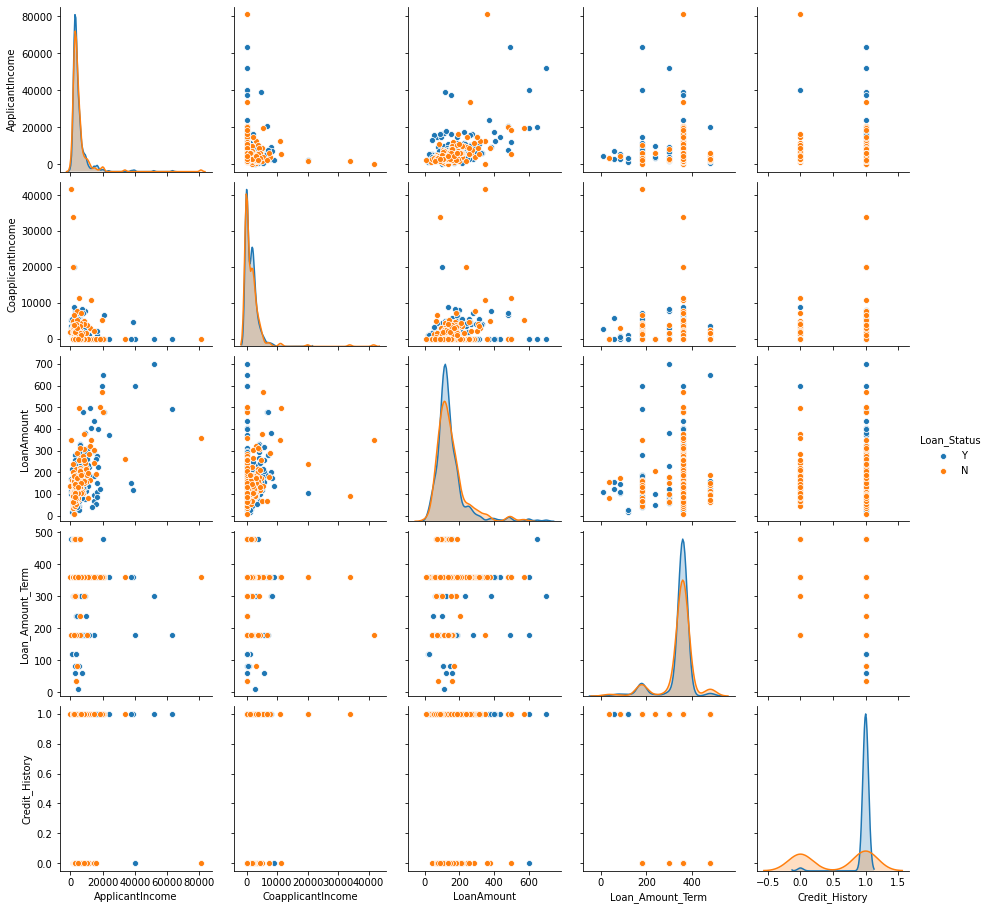

In [26]:
# pairplot of the datasets
sns.pairplot(df,hue='Loan_Status',diag_kind='kde')

* Most of the features are highly positively skewed.

## Univariate Analysis

In [27]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
## Gender:

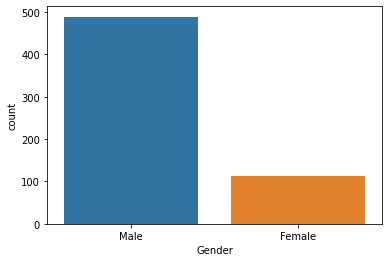

In [30]:
sns.countplot(df.Gender)

* Number of male applicant are more than feamales, which is kinda obvious.

In [31]:
# Married:

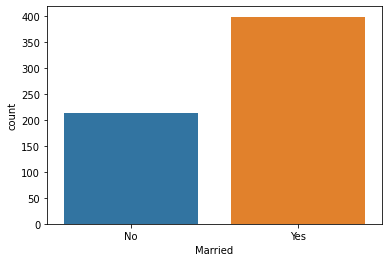

In [32]:
sns.countplot(df.Married)

* The number of married applicant are greater than Unmarried apllicants.
* The married guys are in more need of money, than the non-married ones.

In [33]:
# Dependence:

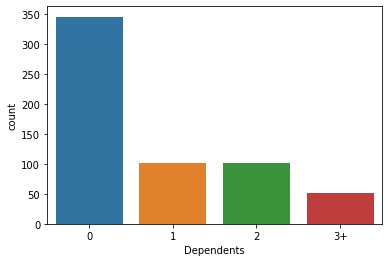

In [34]:
sns.countplot(df.Dependents,order=df.Dependents.value_counts().index)

* Dependence is a categorical value
* There are 4 Categories in the dependence feature.
    * <b>0:</b> No one is depedent of the applicant
    * <b>1:</b> 1 people are dependent of the applicant.
    * <b>2:</b> 2 people are dependent of the applicant.
    * <b>3+:</b> 3 or more than 3 people are dependent of the applicant.
* Most of the applicants have no dependencies.
* A very few of the applicant have 3 or more peole depending on them.

In [35]:
# Education

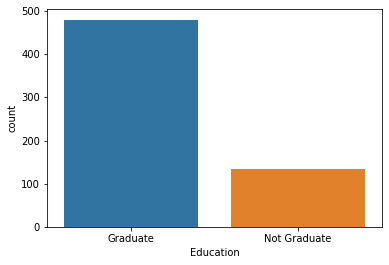

In [36]:
sns.countplot(df.Education)

* Again a Binary value, Graduate vs Non graduated.
* The number of Graduates applying for the load in higher than the Non-Grads.

In [37]:
# Self-Employed

* An Employee or a Business-man?

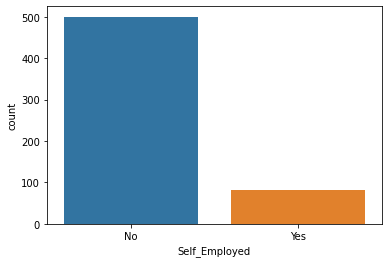

In [38]:
sns.countplot(df.Self_Employed)

* Very few individuals with business are taking intersent in this bank for their Loans.
* Being a business-man you are in need of Capitals, for that you need loans, which are taken from the mostly banks.
* This bank should develope tachniques to bring in more Self_Employed peoples in this bank to take loans.

In [39]:
# Applicant Income

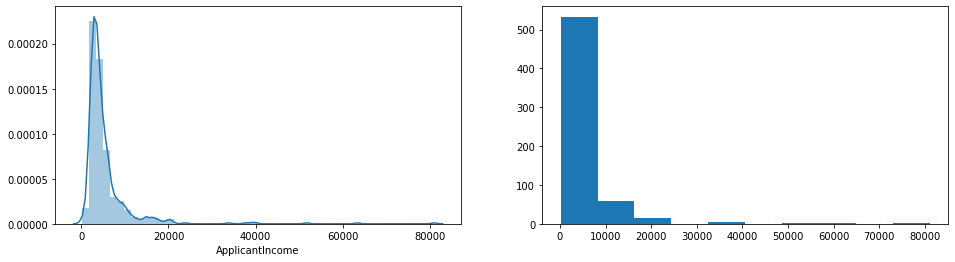

In [40]:
fig = fig_this_size(16,4)


fig.add_subplot(121)
sns.distplot(df.ApplicantIncome)

fig.add_subplot(122)
plt.hist(df.ApplicantIncome);

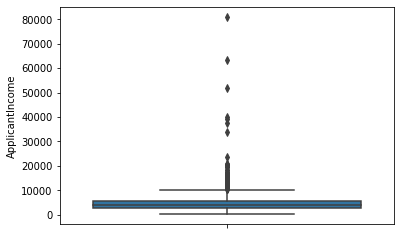

In [41]:
sns.boxplot(df.ApplicantIncome,orient='v')

* There are some outliers in the Income feature.
* Most of the people have thier income under 20K.
* The applicant with income more than 60K is more likely to be a fraud rather than an applicant with income less than 20K

In [42]:
df.ApplicantIncome.value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [43]:
df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

* We have an applicant whose imcome is more than 80K, who is potential of taking a huge loan.
* This applicant should is either likely to be a great customer or a Scamster.
* The bank must look in-depth and have a strong collateral if it decides to give loan to such applicants.

In [44]:
# Co-applicant Income:

* A <b>Co-Applicant</b> refers to a person who applies along with the borrower for a loan. This is done so that the income of the co-applicant can be used to supplement the borrower's income and increase his/her eligibility.
* In short, the higher the Co-applicants income the higher the applicants chance of being eligible for the loan.

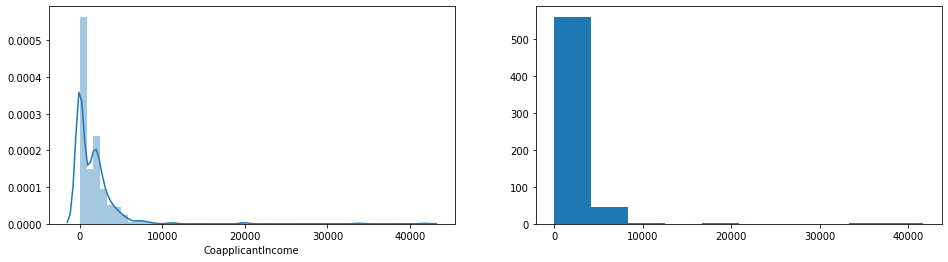

In [45]:
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(df.CoapplicantIncome)

fig.add_subplot(122)
plt.hist(df.CoapplicantIncome);

In [46]:
df.CoapplicantIncome.value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
1750.0      3
         ... 
1863.0      1
7166.0      1
2138.0      1
2166.0      1
4583.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [47]:
df.CoapplicantIncome.value_counts()/len(df) * 100

0.0       44.462541
2500.0     0.814332
2083.0     0.814332
1666.0     0.814332
1750.0     0.488599
            ...    
1863.0     0.162866
7166.0     0.162866
2138.0     0.162866
2166.0     0.162866
4583.0     0.162866
Name: CoapplicantIncome, Length: 287, dtype: float64

* Around 45 percent of the Applicants either do not have a Co-appli0cant or the Co-applicant isn't Working.

In [48]:
df.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

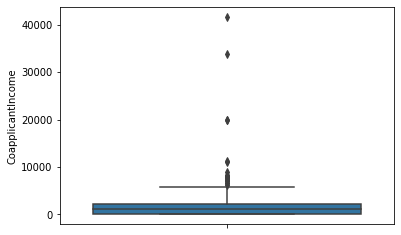

In [49]:
sns.boxplot(df.CoapplicantIncome,orient='v')

In [50]:
# LoanAmount

* The amount of Loan the Apllicant has applied for (in thousands).

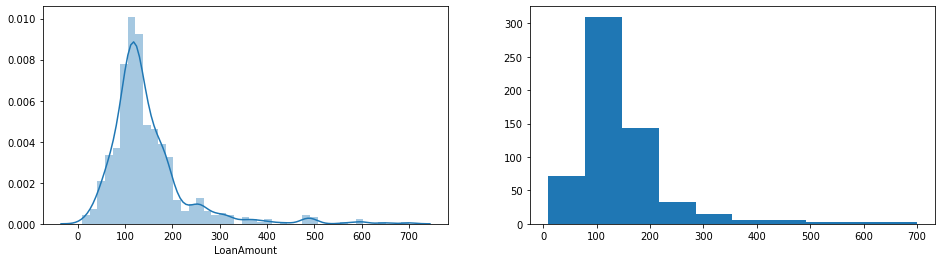

In [51]:
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(df.LoanAmount)

fig.add_subplot(122)
plt.hist(df.LoanAmount);

In [52]:
df.dropna().sort_values('LoanAmount',ascending=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y


In [53]:
# Loan_Amount_Term

* The period to pay back the load amount with interest (in months)
* Note: The Loan_AMount_Term is also set by the applicant and not the bank.

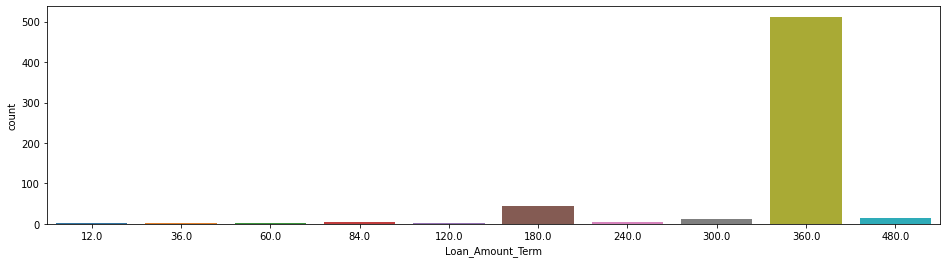

In [54]:
fig_this_size(16,4)
sns.countplot(df.Loan_Amount_Term)

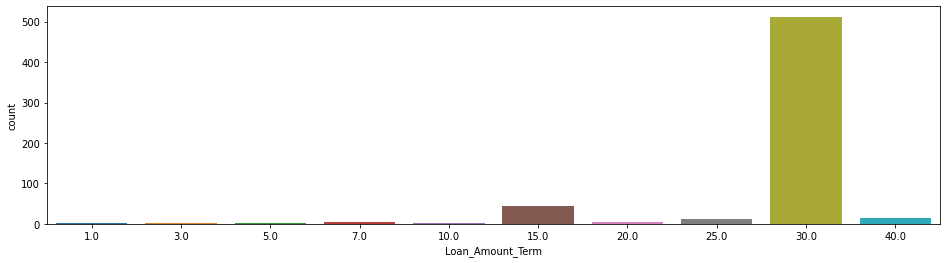

In [55]:
# it's better to visualize it in the years instead of months sometimes.
fig_this_size(16,4)
sns.countplot(df.Loan_Amount_Term/12)

* Most of the poeple apply for loan_amount_term as 360 months (30 years)

In [56]:
# let's ge the avearge loan amount the client applied for 360 months
df[df.Loan_Amount_Term == 360]['LoanAmount'].median()

129.0

* This amount of loan (around 1,30,000) is mostly taken by an applicant to Either buy a house or start-up his business.

In [57]:
# Credit_History

* Positive or Negative credit history.
        * 1: Positive Credit History.
        * 0: Negative Credit History.

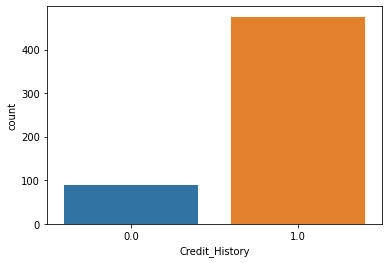

In [58]:
sns.countplot(df.Credit_History)

In [59]:
pd.DataFrame(np.array(list(zip(df.Credit_History.value_counts().index.map({0:'Negative(0)',1:'Positive(1)'}),df.Credit_History.value_counts(),df.Credit_History.value_counts()/len(df)*100))),columns=['Credit_History','Applicants','Percentage_of_Applicants']).set_index('Credit_History')

,Applicants,Percentage_of_Applicants
Credit_History,,
Positive(1),475,77.36156351791531
Negative(0),89,14.495114006514658


* Around 15 percent of the total applicants ahve negative credit_history,
* Credit history becomes negative if a person does not pay his bills in time.
* Credit history plays an important role in Lendingthe loans to applicants.

In [60]:
# applicants with negative credit_history
df[df.Credit_History == 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [61]:
df[df.Credit_History == 0]['Loan_Status'].value_counts()/len(df[df.Credit_History == 0]) * 100

N    92.134831
Y     7.865169
Name: Loan_Status, dtype: float64

* As we can see, the people Credit_History = 0(Negative) have very less chance of getting the loan approved by tha bank.
* Only 7 percent of the total appicants who applied for the loan got their loan approved.

In [62]:
# lt's look at those 7 percent of guys wih negative credit_history got their loan approved

In [63]:
df[((df.Credit_History == 0) & (df.Loan_Status == 'Y'))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y


* The bank should definietly reviews these applicants again.
* Mayble they had some sorty of internal connection with the bank or its employee.
* One of those is an applicant with Income of 40,000, the applicant is a potental suspect as he has opted for the highest amount of loan the bank offers with no Co-applicant involve.

In [64]:
# property area

* This is the region where the property of the applicant is present (as a collateral for the loan).
* So basically, if the property is in an urban region, the bank can approve loan for the applicant). 
* Propert_Area is an ordinal value

In [65]:
df.Property_Area.value_counts().index[::-1]

Index(['Rural', 'Urban', 'Semiurban'], dtype='object')

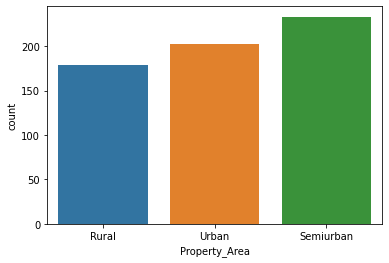

In [66]:
sns.countplot(df.Property_Area,order=df.Property_Area.value_counts().index[::-1])

In [67]:
# Loan_Status

* This is the target variable.
* This variable shows if the loan is approved or not.

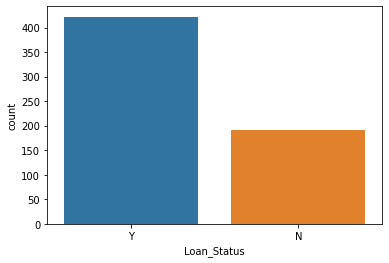

In [68]:
sns.countplot(df.Loan_Status)

In [69]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [70]:
df.Loan_Status.value_counts()/len(df) * 100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

* 68 percent of the loans were approved and the rest were declined.

## Multi-variate Analysis

In [71]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


(0.0, 25000.0)

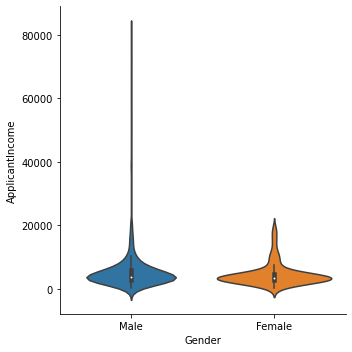

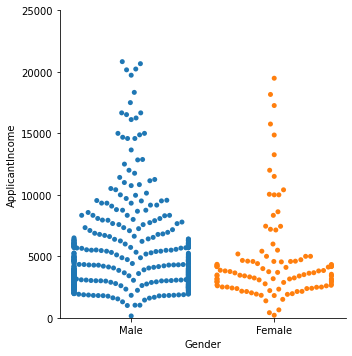

In [72]:
sns.catplot('Gender','ApplicantIncome',data=df,kind='violin')

sns.catplot('Gender','ApplicantIncome',data=df,kind='swarm')
plt.ylim([0,25000])

* Most of the applicant have a salary under 6K.

In [73]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Figure size 1080x1080 with 0 Axes>

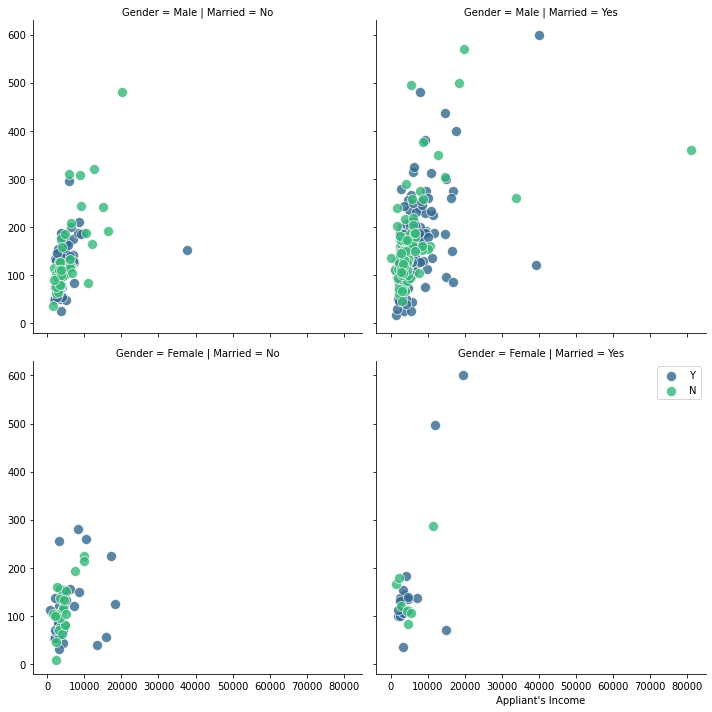

In [74]:
fig_this_size(15,15)
g = sns.FacetGrid(df, col="Married",  row="Gender",hue='Loan_Status',height=5,palette='viridis')

g.map_dataframe(sns.scatterplot, x="ApplicantIncome",y = 'LoanAmount',s=100,alpha=0.8)
plt.legend()
plt.xlabel("Appliant's Income")
plt.ylabel('Applied Loan Amount')
plt.tight_layout()

* Most of the applicants are Married Males and the Fewest applicant are from married females.

In [75]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


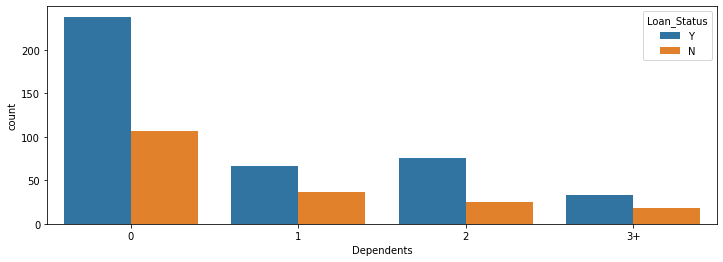

In [76]:
# dependents vs Loan_Status
fig_this_size(12,4)
sns.countplot(df.Dependents,hue=df.Loan_Status)

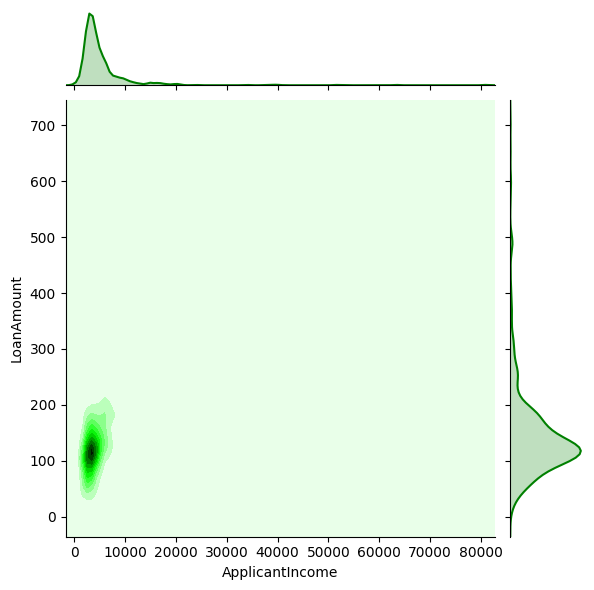

In [77]:
# joinplot
plt.style.use('default')
sns.jointplot(df.ApplicantIncome,df.LoanAmount,kind='kde',color='green')

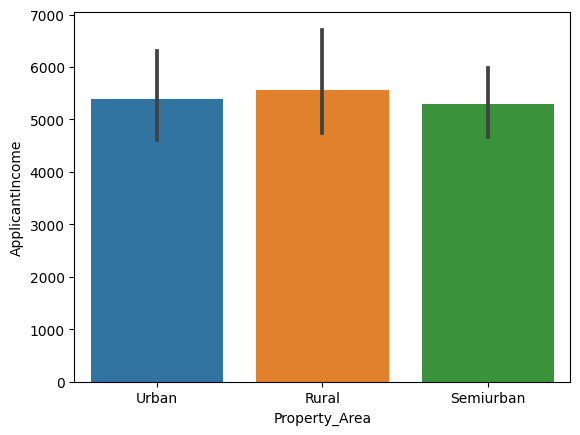

In [78]:
sns.barplot(df.Property_Area,df.ApplicantIncome)

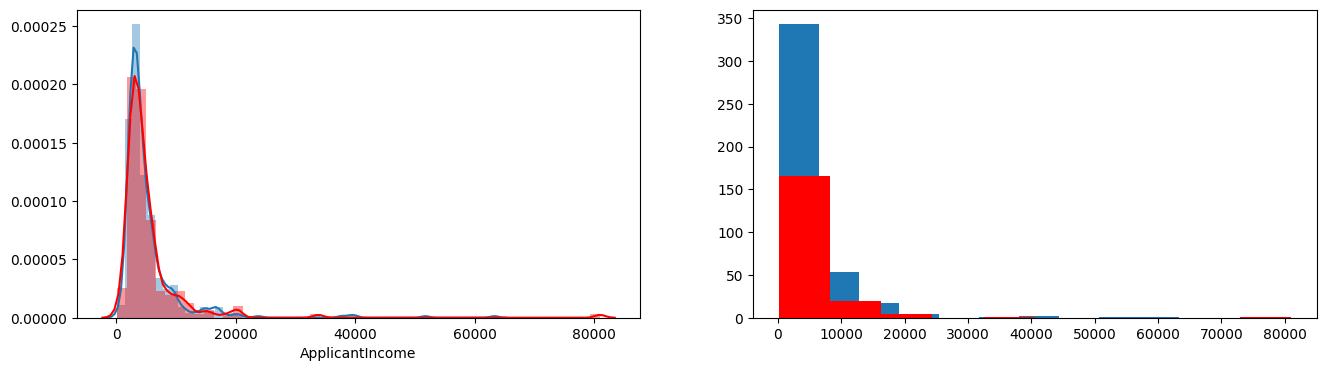

In [79]:
# income with creadit history
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(df[df.Loan_Status == 'Y'].ApplicantIncome)
sns.distplot(df[df.Loan_Status == 'N'].ApplicantIncome,color='red')

fig.add_subplot(122)
plt.hist(df[df.Loan_Status == 'Y'].ApplicantIncome)
plt.hist(df[df.Loan_Status == 'N'].ApplicantIncome,color='red');

## Adressing the missing values

* We will keep the raw dataframe as it is and create a copy of the raw dataframe and  clean that dataset and build a model on top of that dataset cleaned dataset.

In [80]:
df_cleaned = df.copy()
df_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


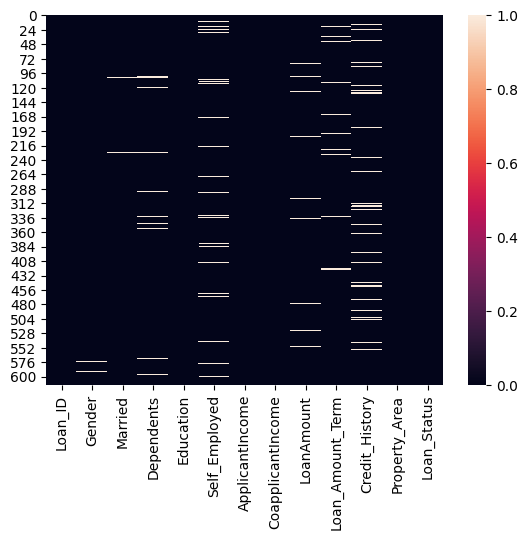

In [81]:
sns.heatmap(df_cleaned.isna())

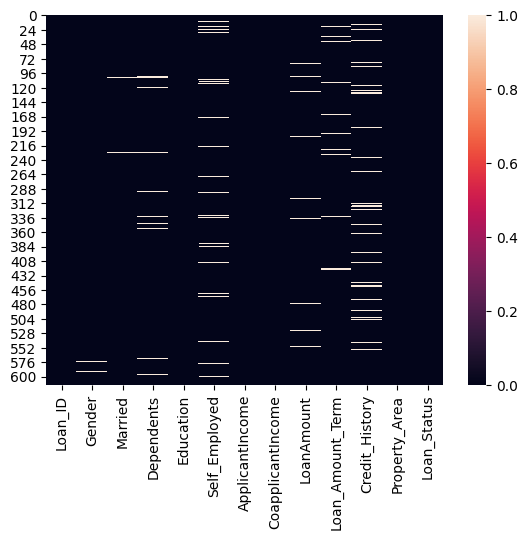

In [82]:
sns.heatmap(df_cleaned.isna())

In [83]:
# let's drop the Loan_ID variable as it is a rendundant feature.
df_cleaned.drop('Loan_ID',1,inplace=True)

In [84]:
# imputing the missing values with median
from feature_engine.missing_data_imputers import MeanMedianImputer,CategoricalVariableImputer

In [85]:
num_var

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [86]:
cat_var

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [87]:
cat_var.remove('Loan_ID')

In [88]:
imputer_num = MeanMedianImputer(imputation_method='median',variables=num_var)
imputer_cat = CategoricalVariableImputer(imputation_method='frequent',variables=cat_var)

In [89]:
df_cleaned = imputer_num.fit_transform(df_cleaned)
df_cleaned = imputer_cat.fit_transform(df_cleaned)

In [90]:
len(df_cleaned)

614

In [91]:
# sanity check  in the imputed dataframe for missing values

In [92]:
df_cleaned.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

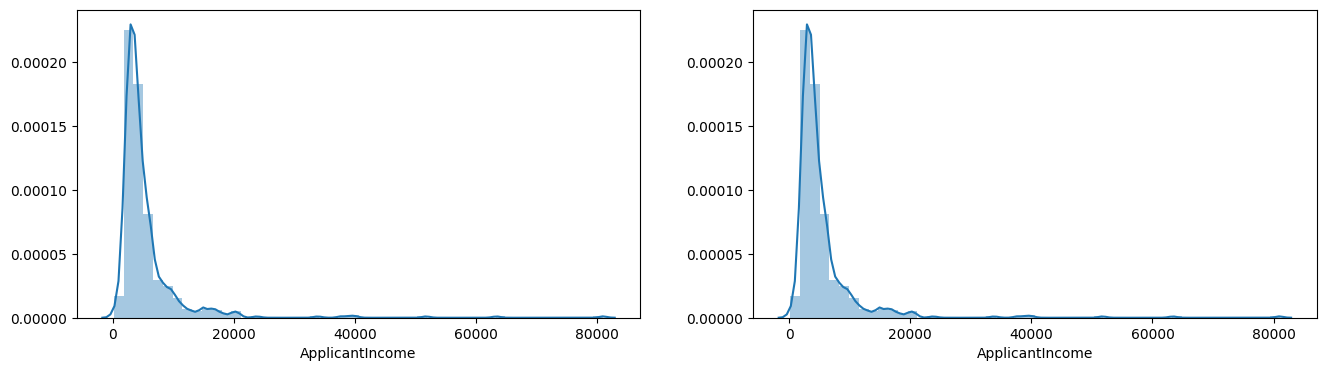

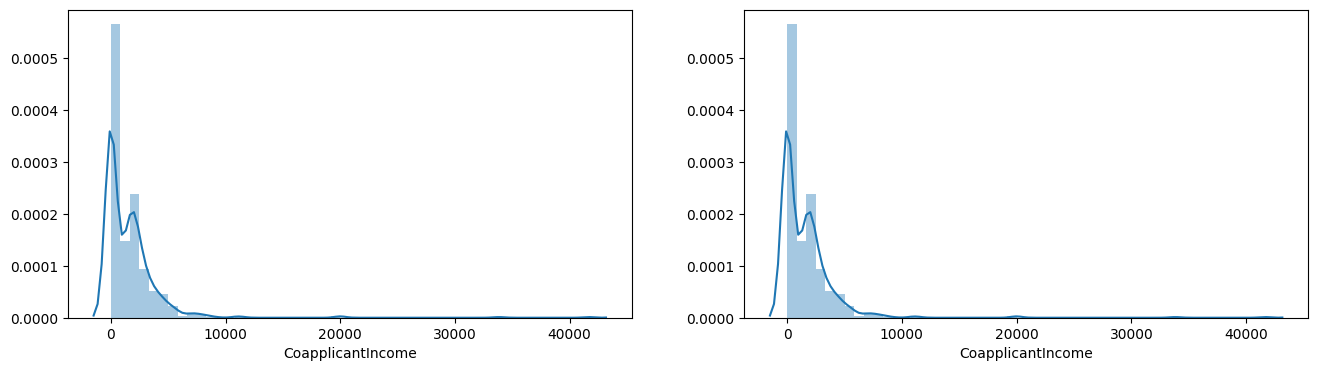

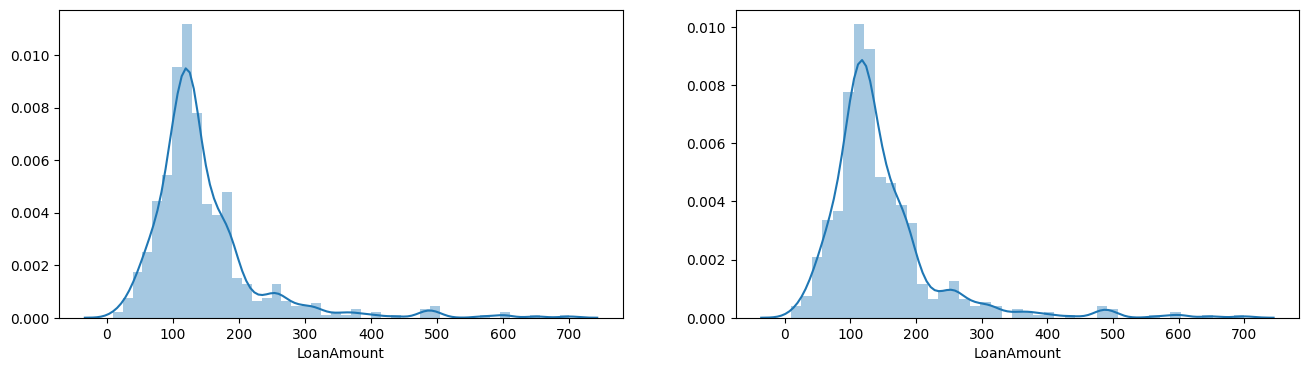

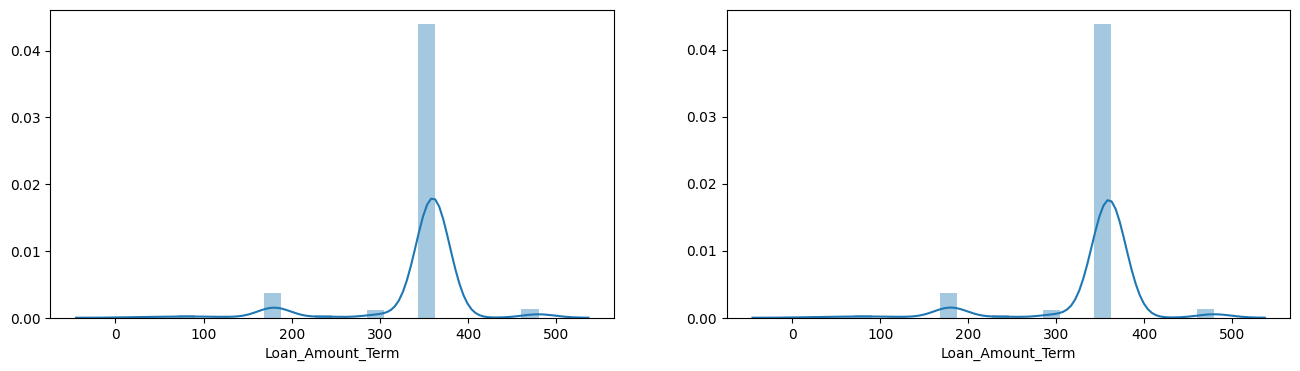

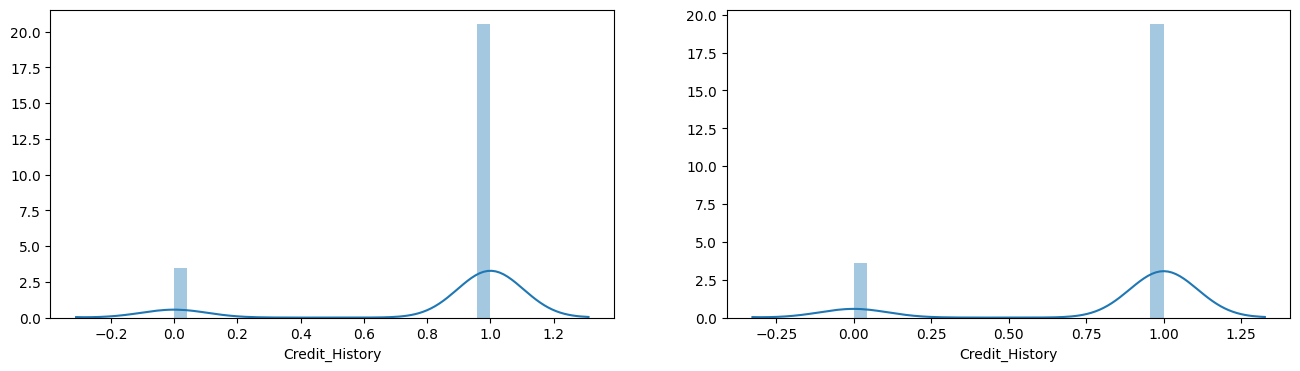

In [93]:
for col in num_var:
    
    fig = fig_this_size(16,4)
    
    fig.add_subplot(121)
    sns.distplot(df_cleaned[col])
    
    fig.add_subplot(122)
    sns.distplot(df[col])

* there's not much difference between the raw distribution and the imputeed distribution.
* Thus,imputation is successfull.

## Removing the outliers

In [94]:
# categories to impute:
feat_with_outliers = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [95]:
# get the distributiion of the cleaned data again

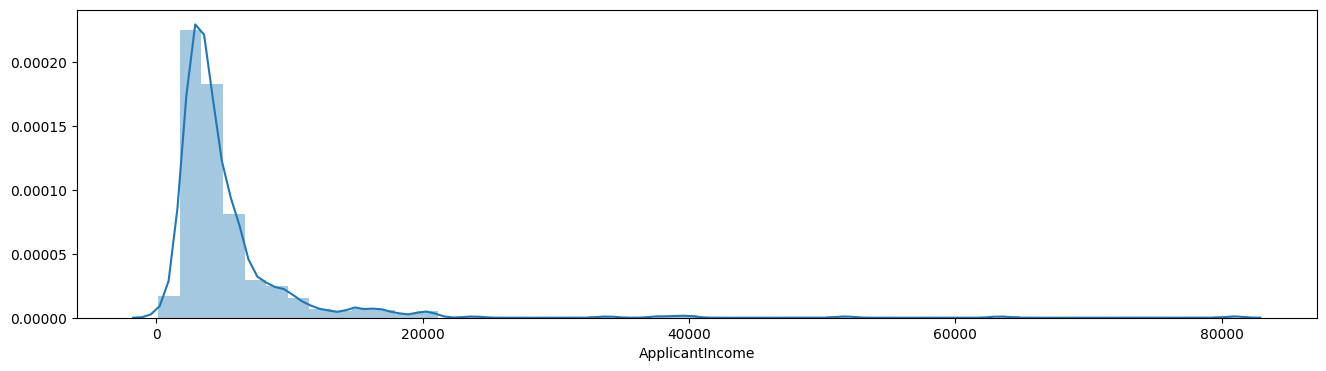

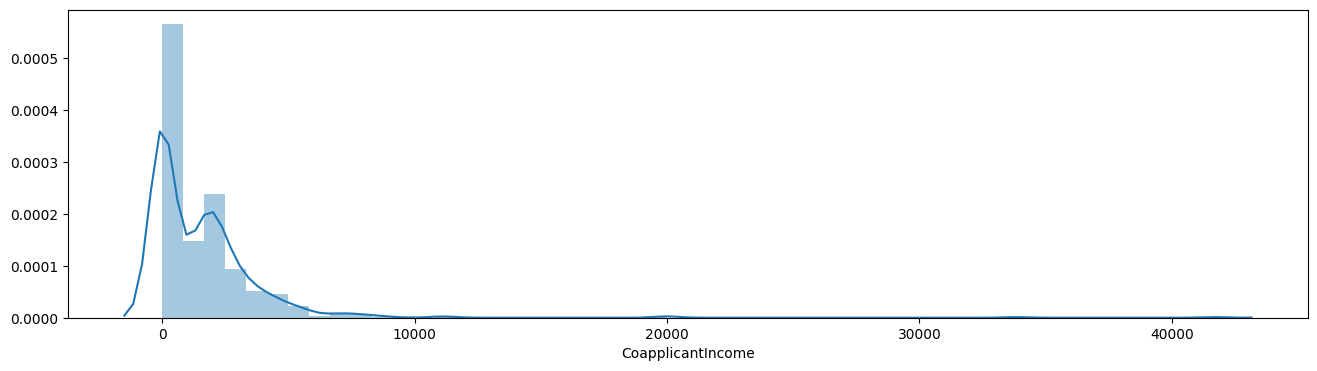

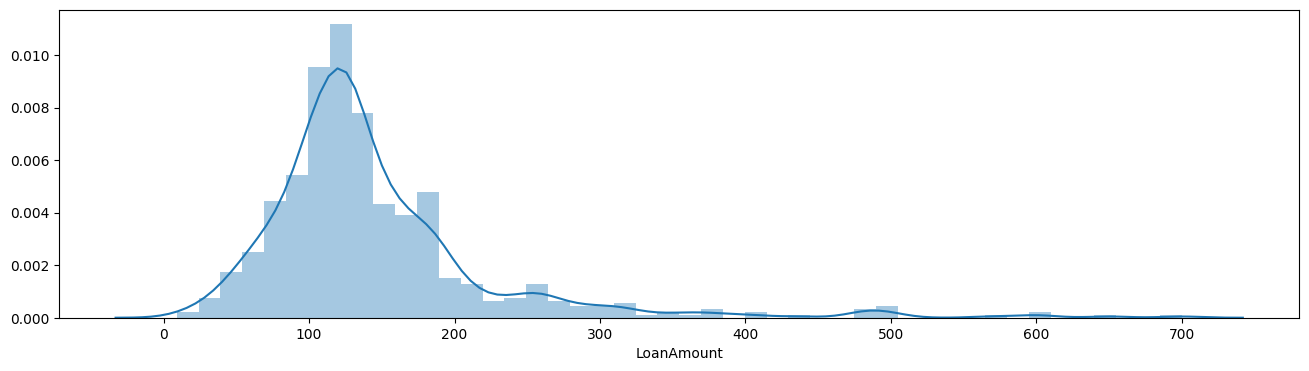

In [96]:
for col in feat_with_outliers:
    
    fig_this_size(16,4)
    sns.distplot(df_cleaned[col])

In [97]:
# Almost all of the features are highly positively skewed

In [98]:
# get the skew stats
df_cleaned.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

* Those are some highly messed up stats.
* Loan_Amount_Term and Credit_History ar categorical variables, therefore do not explose them to the outlier removal technique.
* If you do ,you will end up removing the categories itself

In [99]:
# First let's remove the outliers from the dataset, as they are the ones strecting the knew values all the time.

In [100]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [101]:
# let's remove the values in the IQR method:
Q1 = df_cleaned[feat_with_outliers].quantile(0.25)
Q3 = df_cleaned[feat_with_outliers].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
dtype: float64


In [102]:
df_cleaned = df_cleaned[~((df_cleaned[feat_with_outliers] < (Q1 - 1.5 * IQR)) |(df_cleaned[feat_with_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [103]:
df_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


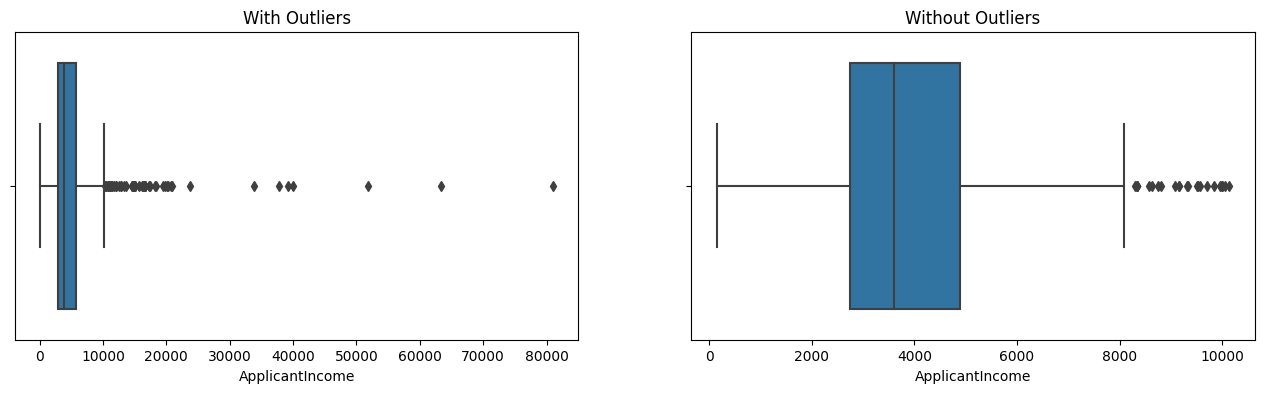

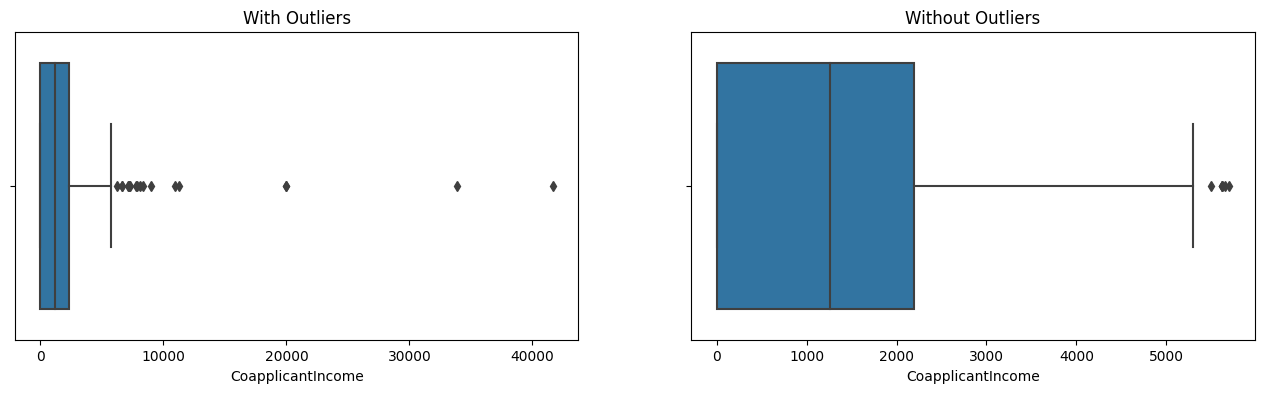

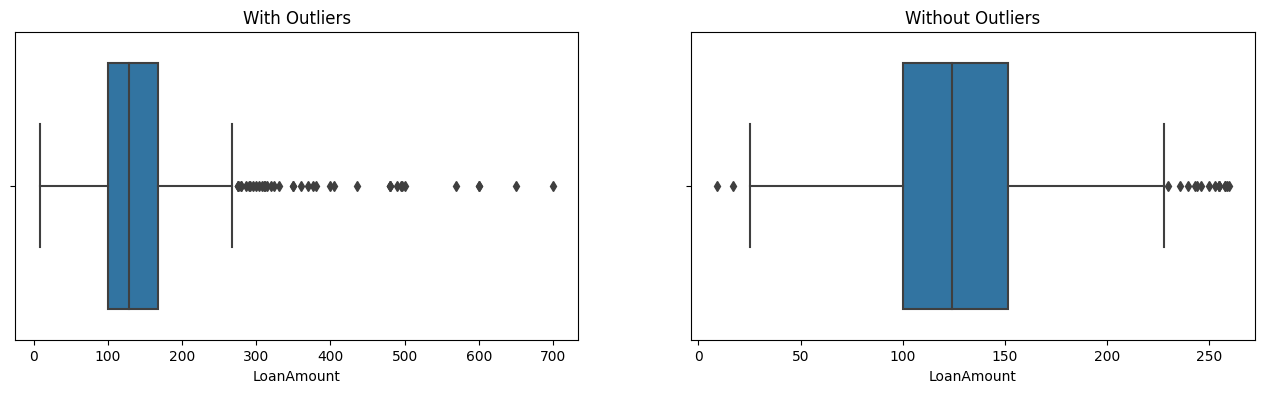

In [104]:

# with outliers vs withour outliers
for col in feat_with_outliers:
    
    fig = fig_this_size(16,4)
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('With Outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.title('Without Outliers')

In [105]:
len(df)-len(df_cleaned)

79

* This is much better than the raw data.
* It cost us around 79 samples, but the were some eoutliers so no worries.

## Check the skewness of the data.

* The skewness of the feautures plays a crutial role muilding up a machine learning model
* Data Scientist love to skew their every feature in a Gausian Distribution.

In [106]:
df_cleaned.skew()

ApplicantIncome      1.142234
CoapplicantIncome    0.845905
LoanAmount           0.449116
Loan_Amount_Term    -2.428175
Credit_History      -2.013048
dtype: float64

* Note that Loan_Amount_term and Credit_History both are categorical variables and not numerical ones.
* So better not to transform them.

In [107]:
to_skew_trnsfm_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [108]:
# we now need to use skw tranformation to make the data look more gaussian

In [109]:
# try1: log transformation
np.log(df_cleaned[to_skew_trnsfm_var]+1).skew()

ApplicantIncome     -0.982387
CoapplicantIncome   -0.255735
LoanAmount          -1.319263
dtype: float64

* Thats way better than the original skew

In [110]:
#try2: sqrt transformation
np.sqrt(df_cleaned[to_skew_trnsfm_var]).skew()

ApplicantIncome      0.455680
CoapplicantIncome    0.070591
LoanAmount          -0.279620
dtype: float64

In [111]:
# let's continue with the transformation
df_cleaned[to_skew_trnsfm_var] = np.sqrt(df_cleaned[to_skew_trnsfm_var])

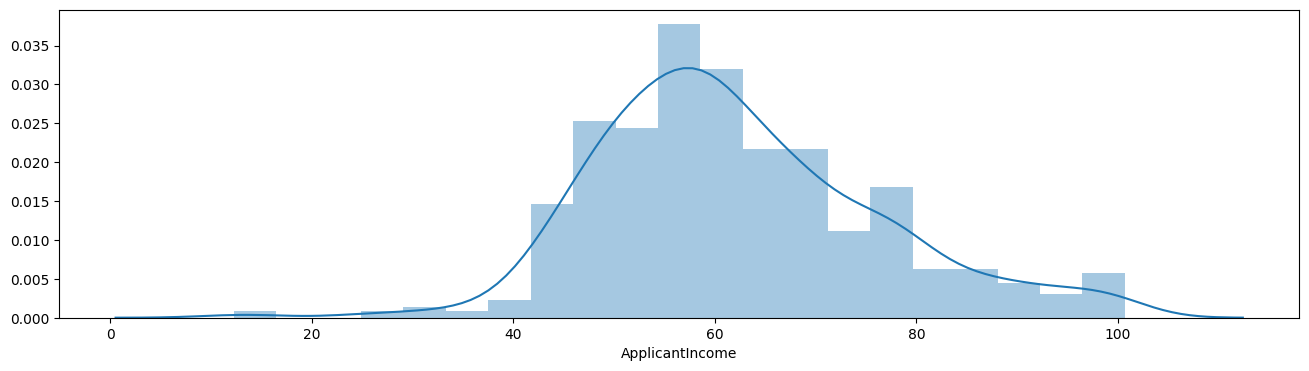

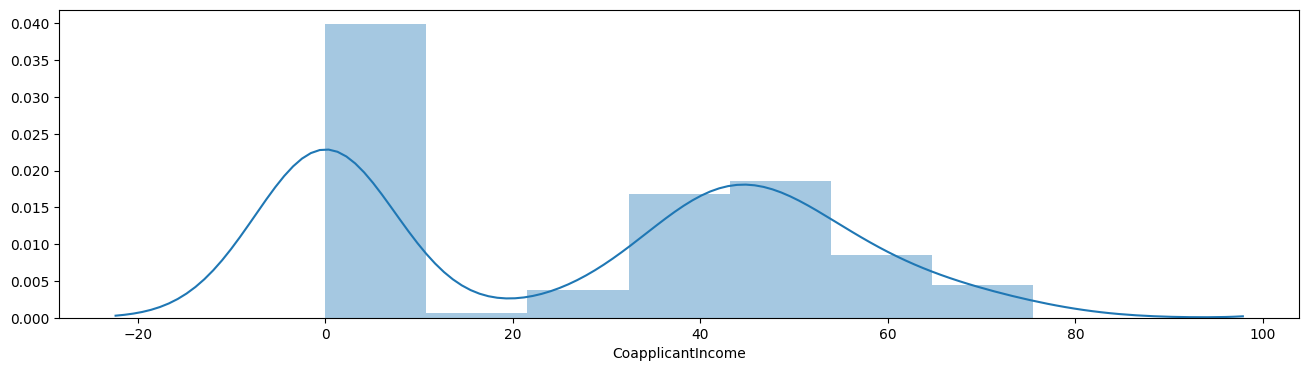

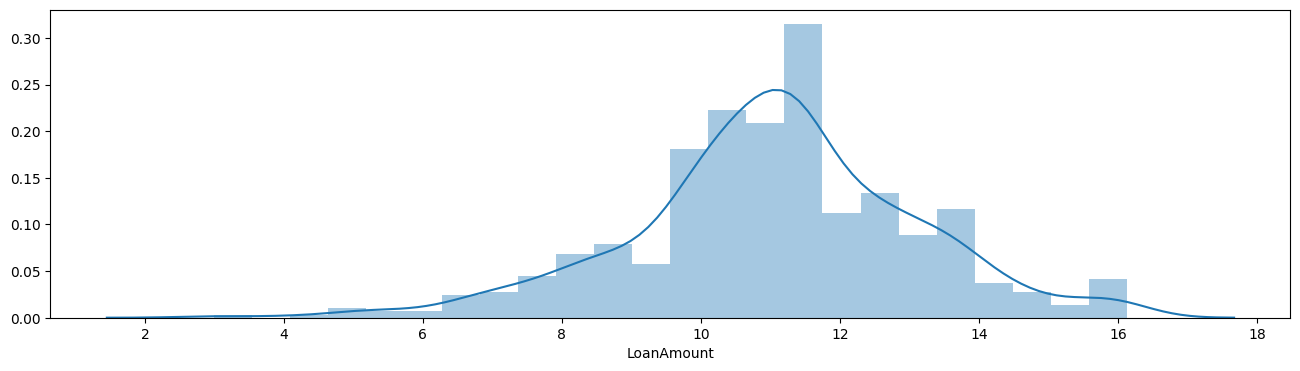

In [112]:
# revised distribution
for col in to_skew_trnsfm_var:
    fig_this_size(16,4)
    sns.distplot(df_cleaned[col])

* Viola!, This is the most decent skew out there!

In [113]:
# let's drop the Loan_ID variable as it is a rendundant feature.
#df_cleaned.drop('Loan_ID',1,inplace=True)

## Encoding the Categorical Value

In [114]:
cat_var = _find_categorical_variables(df_cleaned)

In [115]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [116]:
cat_var

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [117]:
one_hot = OneHotCategoricalEncoder(variables=cat_var,drop_last=True)

In [118]:
# fitting the one hot encoder to the dataset.
df_cleaned  = one_hot.fit_transform(df_cleaned)

In [119]:
df_cleaned

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_No,Dependents_0,Dependents_1,Dependents_3+,Education_Graduate,Self_Employed_No,Property_Area_Urban,Property_Area_Rural,Loan_Status_Y
0,76.478755,0.000000,11.313708,360.0,1.0,1,1,1,0,0,1,1,1,0,1
1,67.697858,38.832976,11.313708,360.0,1.0,1,0,0,1,0,1,1,0,1,0
2,54.772256,0.000000,8.124038,360.0,1.0,1,0,1,0,0,1,0,1,0,1
3,50.823223,48.559242,10.954451,360.0,1.0,1,0,1,0,0,0,1,1,0,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,1,1,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,53.851648,0.000000,8.426150,360.0,1.0,0,1,1,0,0,1,1,0,1,1
610,64.078077,0.000000,6.324555,180.0,1.0,1,0,0,0,1,1,1,0,1,1
611,89.844310,15.491933,15.905974,360.0,1.0,1,0,0,1,0,1,1,1,0,1
612,87.080423,0.000000,13.674794,360.0,1.0,1,0,0,0,0,1,1,1,0,1


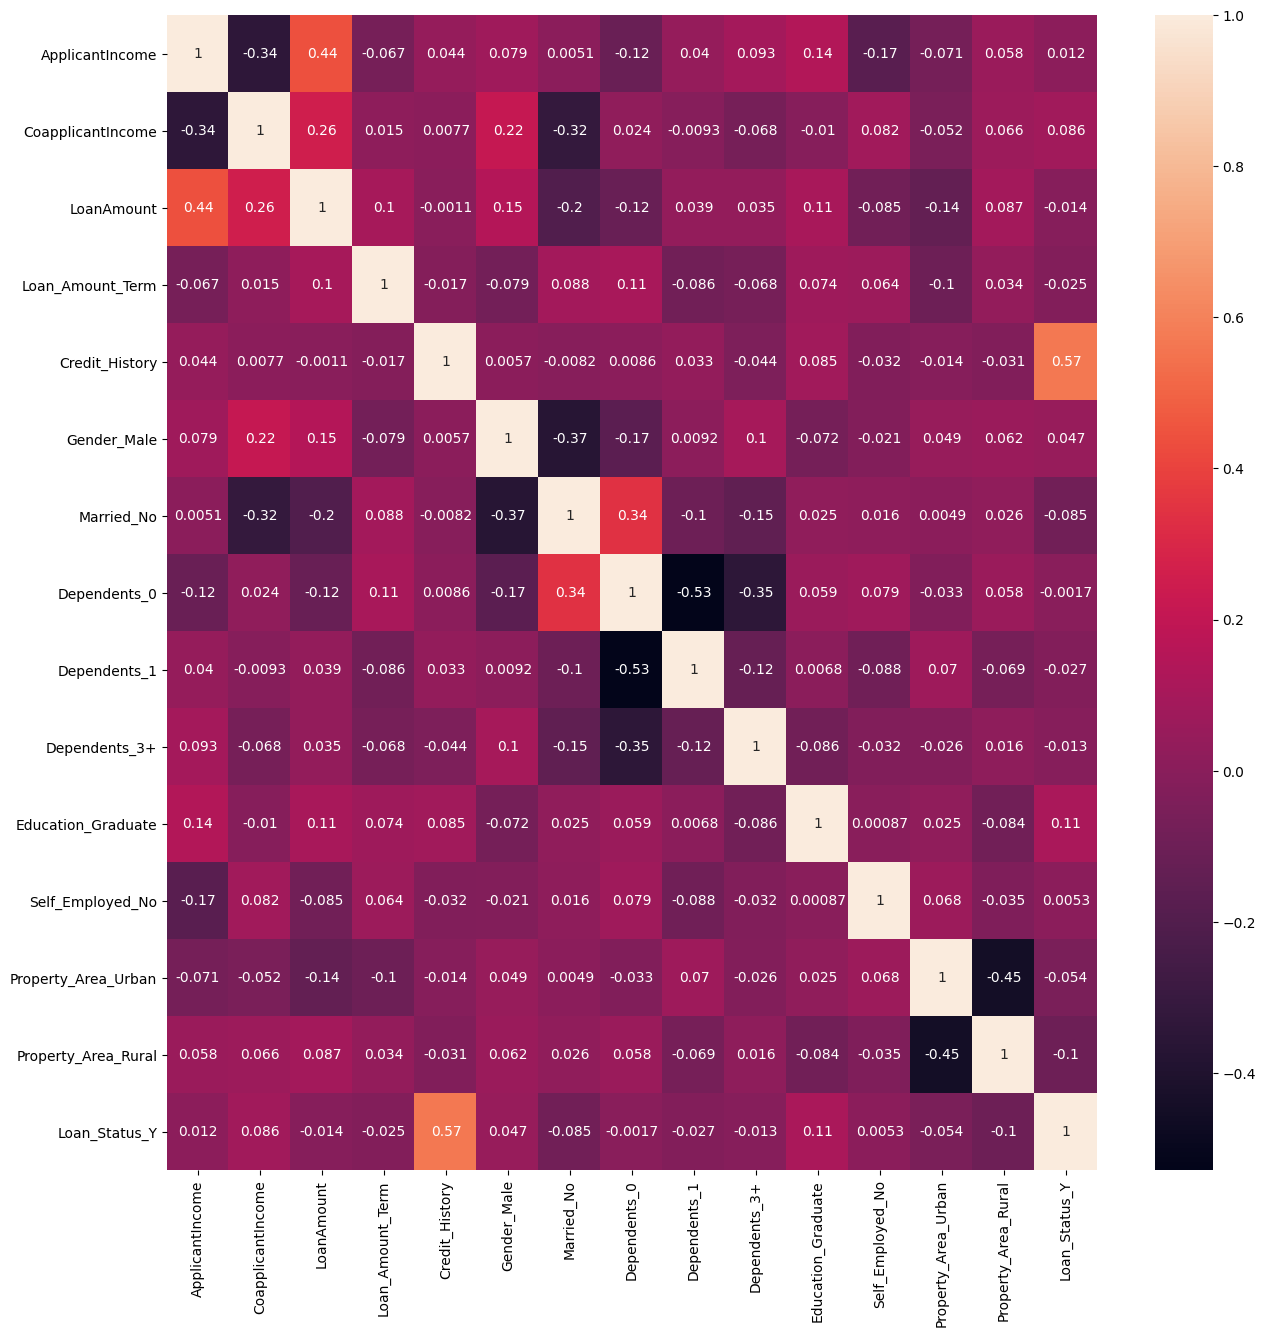

In [120]:
# check the corrations once more,
fig_this_size(15,15)
sns.heatmap(df_cleaned.corr(),annot=True)

All Good!

## Splitting X and y

In [121]:
X = df_cleaned.drop('Loan_Status_Y',1)
y = df_cleaned.Loan_Status_Y

In [122]:
# check the shapes 
X.shape,y.shape

((535, 14), (535,))

In [123]:
## Splitting the training anf test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 50)

In [124]:
X_train.columns[:4]

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [125]:
# again the shapes for sanity check
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((358, 14), (358,), (177, 14), (177,))

## Building up the model

In [126]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [127]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [128]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_test,y_test))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test)))
    print('Precision:',recall_score(y_test,model.predict(X_test)))
    print('F1:',recall_score(y_test,model.predict(X_test)))

    

In [129]:
#try1: Logistic Regression
train_n_ret_scores(LogisticRegression())

Train_Acc: 0.847457627118644
Test_Acc: 0.847457627118644
Recall: 0.9752066115702479
Precision: 0.9752066115702479
F1: 0.9752066115702479


In [130]:
#try2: SVC
train_n_ret_scores(SVC(kernel='linear'))

Train_Acc: 0.8531073446327684
Test_Acc: 0.8531073446327684
Recall: 0.9834710743801653
Precision: 0.9834710743801653
F1: 0.9834710743801653


In [131]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.6497175141242938
Test_Acc: 0.6497175141242938
Recall: 0.8677685950413223
Precision: 0.8677685950413223
F1: 0.8677685950413223


In [132]:
#try4: GaussianNB
train_n_ret_scores(GaussianNB())

Train_Acc: 0.8531073446327684
Test_Acc: 0.8531073446327684
Recall: 0.9834710743801653
Precision: 0.9834710743801653
F1: 0.9834710743801653


In [133]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 0.6892655367231638
Test_Acc: 0.6892655367231638
Recall: 0.743801652892562
Precision: 0.743801652892562
F1: 0.743801652892562


In [134]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 0.8418079096045198
Test_Acc: 0.8418079096045198
Recall: 0.9256198347107438
Precision: 0.9256198347107438
F1: 0.9256198347107438


In [135]:
#try5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.8248587570621468
Test_Acc: 0.8248587570621468
Recall: 0.9256198347107438
Precision: 0.9256198347107438
F1: 0.9256198347107438


In [136]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.7966101694915254
Test_Acc: 0.7966101694915254
Recall: 0.8925619834710744
Precision: 0.8925619834710744
F1: 0.8925619834710744


In [137]:
#try7: Adaboost with Logistic
train_n_ret_scores(AdaBoostClassifier(base_estimator=LogisticRegression()))

Train_Acc: 0.847457627118644
Test_Acc: 0.847457627118644
Recall: 0.9752066115702479
Precision: 0.9752066115702479
F1: 0.9752066115702479


In [138]:
# Let's create a dataframe with all the models in it

In [139]:
# choosing the best model


models = [LogisticRegression(),SVC(kernel='linear'),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [140]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.812849,0.847458,0.847458,0.847458,0.847458,0.798826
1,SVC,0.807263,0.853107,0.853107,0.853107,0.853107,0.807199
2,KNN,0.793296,0.649718,0.649718,0.649718,0.649718,0.684351
3,Random_forest,1.000000,0.711864,0.711864,0.711864,0.711864,0.698161
4,Decision_Treee,1.000000,0.830508,0.830508,0.830508,0.830508,0.795970
5,Gradient_boost,0.960894,0.790960,0.790960,0.790960,0.790960,0.765180
6,Adaboost,1.000000,0.836158,0.836158,0.836158,0.836158,0.773631


* After training n number of models, we can finally conclude that the <b>Support Vector Classifier with Linear Kernel</b> model is working th best in this case.

In [141]:
# Lets try tuning the logistic Regression model
from sklearn.model_selection import GridSearchCV

In [142]:
param_dict = {
    'C':[1.0,10,100],
    'kernel':['rbg','linear'],
    'gamma':['scale',0.1,0.01,0.001]
    
}

In [143]:
gs_model = GridSearchCV(SVC(),param_grid=param_dict,verbose=2)

In [144]:
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=1.0, gamma=scale, kernel=linear, total=   0.8s
[CV] C=1.0, gamma=scale, kernel=linear ...............................
[CV] ................ C=1.0, gamma=scale, kernel=linear, total=   2.9s
[CV] C=1.0, gamma=scale, kernel=linear ...............................
[CV] ................ C=1.0, gamma=scale, kernel=linear, total=   2.0s
[CV] C=1.0, gamma=scale, kernel=linear ...............................
[CV] ................ C=1.0, gamma=scale, kernel=linear, total=   1.2s
[CV] C=1.0, gamma=scale, kernel=linear ...............................
[CV] ................ C=1.0, gamma=scale, kernel=linear, total=   1.6s
[CV] C=1.0, gamma=0.1, kernel=rbg ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbg ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbg ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 10, 100],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['rbg', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [145]:
gs_model.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [146]:
gs_model.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

In [153]:
gs_model.best_score_

0.8071987480438185

In [158]:
best_model = SVC(kernel='linear')

In [159]:
best_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [168]:
train_n_ret_scores(best_model)

Train_Acc: 0.8531073446327684
Test_Acc: 0.8531073446327684
Recall: 0.9834710743801653
Precision: 0.9834710743801653
F1: 0.9834710743801653


In [171]:
y_preds = best_model.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1])

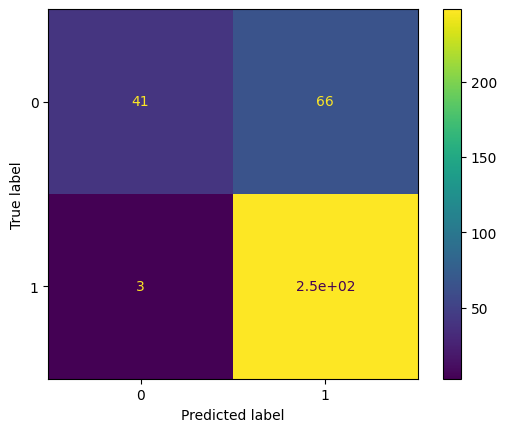

In [162]:
plot_confusion_matrix(best_model,X_train,y_train)

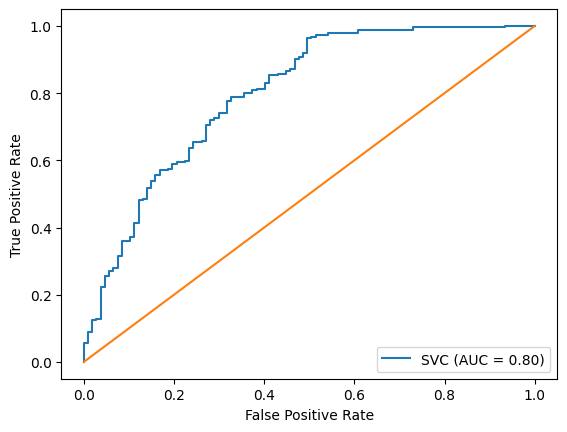

In [166]:
plot_roc_curve(best_model,X_train,y_train)
plt.plot(y_train,y_train)

In [167]:
## Saving the best model
import joblib 
joblib.dump(best_model,'loan_prediction.pkl')

['loan_prediction.pkl']